# Titanic a vizualizace dat
Zaměříme se na pasažéry Titanicu. Budeme pomocí různých grafů sledovat jejich věk, třídu, pohlaví a cenu jízdenky

In [1]:
###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
###
# Načtení celého datasetu
df = sns.load_dataset("titanic")
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Úkol 1: vizualizace věku podle tříd

<AxesSubplot:xlabel='class', ylabel='age'>

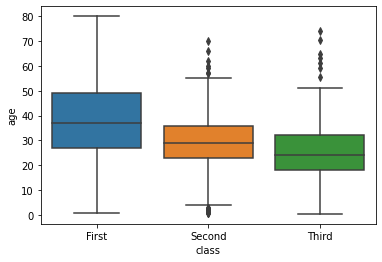

In [4]:
# základní boxplot věk - třída
sns.boxplot(data=df, x="class", y="age")


<AxesSubplot:xlabel='class', ylabel='age'>

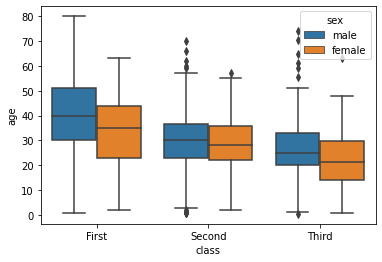

In [5]:
# přidáme i pohlaví
sns.boxplot(data=df, x="class", y="age", hue="sex")


<AxesSubplot:xlabel='class', ylabel='age'>

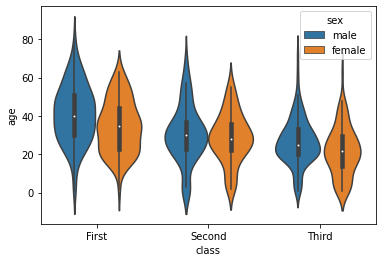

In [6]:
# změníme zobrazení na violinplot
sns.violinplot(data=df, x="class", y="age", hue="sex")


<AxesSubplot:xlabel='class', ylabel='age'>

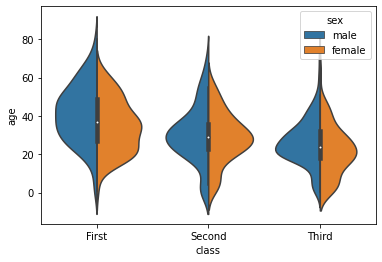

In [7]:
# složíme 2 violin ploty do sebe
sns.violinplot(data=df, x="class", y="age", hue="sex", split=True)


<AxesSubplot:xlabel='class', ylabel='age'>

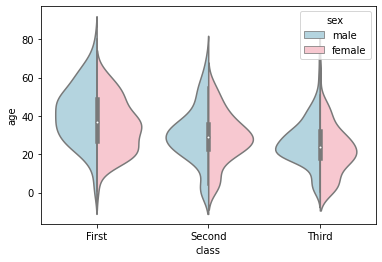

In [9]:
# a upravíme barvy
sns.violinplot(data=df, x="class", y="age", hue="sex", split=True,
               palette={"male": "lightblue", "female": "pink"})


## Úkol 2: histogram

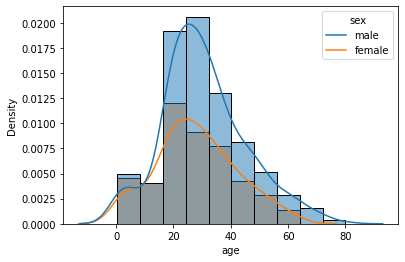

In [10]:
# zobrazíme histogram a přes něj KDE
ax = sns.histplot(data=df, x="age", hue="sex", stat="density", bins=10)
ax = sns.kdeplot(data=df, x="age", hue="sex", ax=ax)


Text(40, 0.02, 'něco')

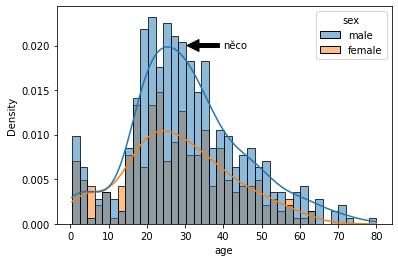

In [17]:
# Zkusíme v grafu něco označit
ax = sns.histplot(data=df, x="age", hue="sex",
                  stat="density", bins=40, kde=True)
ax.annotate("něco", xy=(30, 0.02), xytext=(40, 0.02),
            arrowprops=dict(facecolor='black', shrink=0.05), va='center')


# Úkol 3: graf korelace věku a ceny lístku

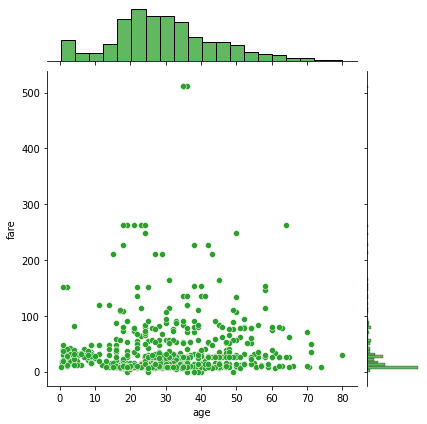

In [22]:
# základní zobrazení
sns.jointplot(data=df, x="age", y="fare", color="tab:green")


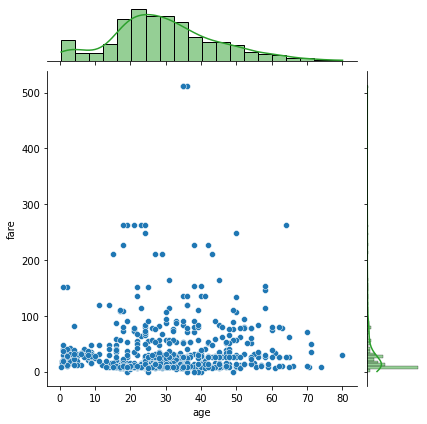

In [26]:
# nakreslime si tento graf pomoci jointgrid, kde přidame i KDE pro histogram
g = sns.JointGrid(data=df, x="age", y="fare")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, kde=True, color="tab:green")
